<a href="https://colab.research.google.com/github/IagoConrado/colab-notebooks/blob/master/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fish Market**


*   Link do dataset: [Fish Market](https://www.kaggle.com/aungpyaeap/fish-market).
*   O dataset contém informações sobre 7 tipos diferentes de espécies de peixes vendidos em um mercado de peixe.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Imports**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Leitura dos dados**

In [3]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/Fish.csv')
dados.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## **Limpeza e organização dos dados**

In [4]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.9+ KB


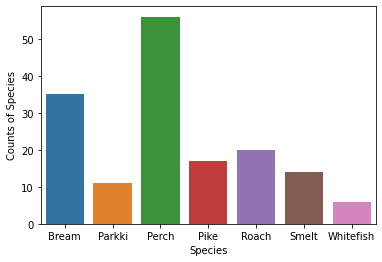

In [8]:
species_count = dados['Species'].value_counts()
species_count = pd.DataFrame(species_count)
sns.barplot(x=species_count.index, y=species_count['Species'])
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

Será criada "dummy variables" para a coluna Species já que ela é uma variável categórica, e dessa forma teremos nas novas colunas com valores 0 ou 1 para definir a qual espécie pertence aquele peixe.

In [6]:
dados['Species']= dados['Species'].astype('category')

In [21]:
data = pd.get_dummies(dados)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             159 non-null    float64
 1   Length1            159 non-null    float64
 2   Length2            159 non-null    float64
 3   Length3            159 non-null    float64
 4   Height             159 non-null    float64
 5   Width              159 non-null    float64
 6   Species_Bream      159 non-null    uint8  
 7   Species_Parkki     159 non-null    uint8  
 8   Species_Perch      159 non-null    uint8  
 9   Species_Pike       159 non-null    uint8  
 10  Species_Roach      159 non-null    uint8  
 11  Species_Smelt      159 non-null    uint8  
 12  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 9.8 KB


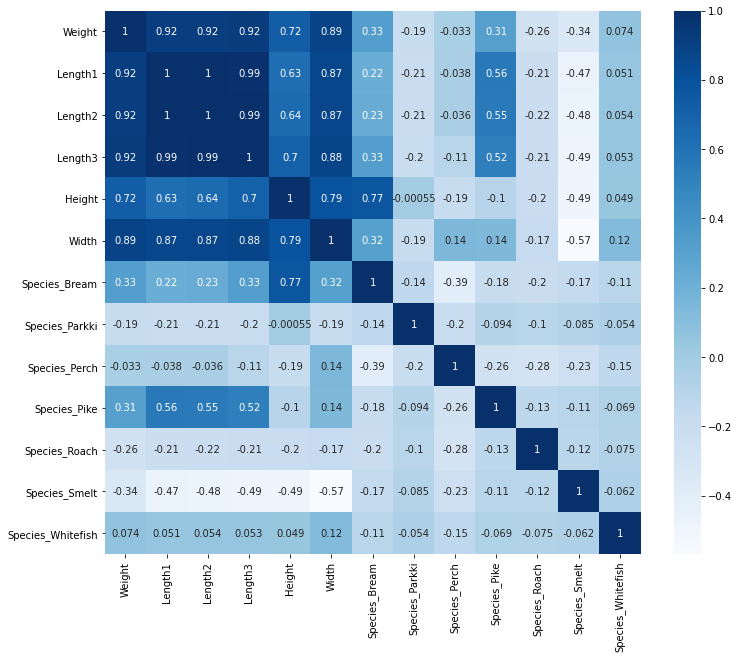

In [26]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, cmap="Blues")
plt.show()

In [28]:
#re-escala dos dados
data = (data - data.min())/(data.max()-data.min())
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Organizando dados para modelagem**

In [37]:
X = data.iloc[:,1:]
X.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.304854,0.309091,0.358108,0.568334,0.418978,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.320388,0.325455,0.378378,0.624055,0.459235,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.318447,0.329091,0.376689,0.618123,0.514279,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365049,0.374545,0.417230,0.638566,0.480365,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368932,0.374545,0.425676,0.621966,0.576004,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y = data.Weight
y.head()

0    0.146667
1    0.175758
2    0.206061
3    0.220000
4    0.260606
Name: Weight, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## **Treinando os modelos e fazendo previsão**

In [45]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)

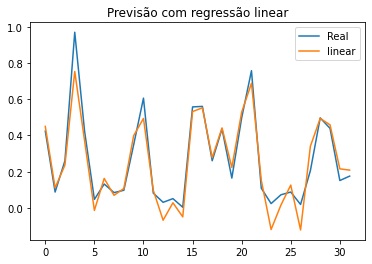

In [46]:
plt.plot(y_test.reset_index(drop=True), label='Real')
plt.plot(linear_pred, label='Linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [47]:
#definindo modelo de árvore de decisão
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
decision_tree_pred = decision_tree.predict(X_test)

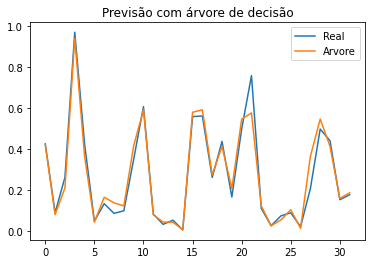

In [49]:
plt.plot(y_test.reset_index(drop=True), label='Real')
plt.plot(decision_tree_pred, label='Arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [50]:
#definindo modelo de random forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,y_train)
random_forest_pred = random_forest.predict(X_test)

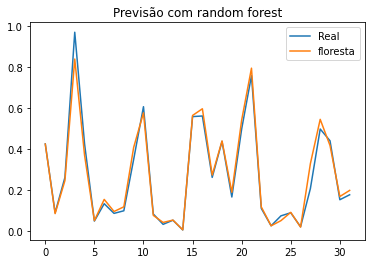

In [51]:
plt.plot(y_test.reset_index(drop=True), label='Real')
plt.plot(random_forest_pred, label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [55]:
#define modelo MLP
mlp = MLPRegressor()
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)

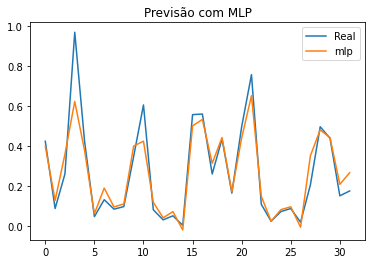

In [56]:
plt.plot(y_test.reset_index(drop=True), label='Real')
plt.plot(mlp_pred, label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

Com os gráficos, é possivel perceber que a árvore de decisão e a random forest apresentaram valores mais próximos dos valores reais.

## **Avaliando Modelos**

### **Mean Absolute Error (MAE)**

In [71]:
print(f'Regressão Linear: {round(mean_absolute_error(y_test, linear_pred) ,5)}')
print(f'Árvore de Decisão: {round(mean_absolute_error(y_test, decision_tree_pred), 5)}')
print(f'Random Forest: {round(mean_absolute_error(y_test, random_forest_pred), 5)}')
print(f'MLP: {round(mean_absolute_error(y_test, mlp_pred), 5)}')

Regressão Linear: 0.0532
Árvore de Decisão: 0.03247
Random Forest: 0.02456
MLP: 0.05267


### **Mean Squared Error (MSE)**

In [72]:
print(f'Regressão Linear: {round(mean_squared_error(y_test, linear_pred), 5)}')
print(f'Árvore de Decisão: {round(mean_squared_error(y_test, decision_tree_pred), 5)}')
print(f'Random Forest: {round(mean_squared_error(y_test, random_forest_pred), 5)}')
print(f'MLP: {round(mean_squared_error(y_test, mlp_pred), 5)}')

Regressão Linear: 0.00518
Árvore de Decisão: 0.00264
Random Forest: 0.00156
MLP: 0.00727


### **Root Mean Squared Error (RMSE)**

In [73]:
print(f'Regressão Linear: {round(mean_squared_error(y_test, linear_pred) ** 1/2, 5)}')
print(f'Árvore de Decisão: {round(mean_squared_error(y_test, decision_tree_pred) ** 1/2, 5)}')
print(f'Random Forest: {round(mean_squared_error(y_test, random_forest_pred) ** 1/2, 5)}')
print(f'MLP: {round(mean_squared_error(y_test, mlp_pred) ** 1/2, 5)}')

Regressão Linear: 0.00259
Árvore de Decisão: 0.00132
Random Forest: 0.00078
MLP: 0.00364


### **Mean Absolute Percentage Error (MAPE)**

In [75]:
def mean_absolute_percentage_error(y_test, y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [76]:
print(f'Regressão Linear: {round(mean_absolute_percentage_error(y_test, linear_pred) ** 1/2, 5)}')
print(f'Árvore de Decisão: {round(mean_absolute_percentage_error(y_test, decision_tree_pred) ** 1/2, 5)}')
print(f'Random Forest: {round(mean_absolute_percentage_error(y_test, random_forest_pred) ** 1/2, 5)}')
print(f'MLP: {round(mean_absolute_percentage_error(y_test, mlp_pred) ** 1/2, 5)}')

Regressão Linear: 0.57057
Árvore de Decisão: 0.08307
Random Forest: 0.05448
MLP: 0.2172


Com as métricas de avaliação e assim como foi exibido nos gráficos anteriormente, percebe-se que a Random Forest obteve resultados melhores seguida pela Árvore de Decisão, Regressão Linear e MLP respectivamente.